In [97]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import statsmodels.api as sm
import sklearn
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
df = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv', index_col=0)
%matplotlib inline

In [29]:
df.head(7)

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9
6,8.7,48.9,75.0,7.2
7,57.5,32.8,23.5,11.8


In [64]:
df[df.TV == 296.4]

,TV,radio,newspaper,sales
102,296.4,36.3,100.9,23.8


In [31]:
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [32]:
df.dtypes

TV           float64
radio        float64
newspaper    float64
sales        float64
dtype: object

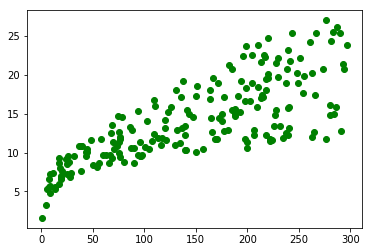

In [33]:
plt.scatter(df.TV,df.sales,color='green')

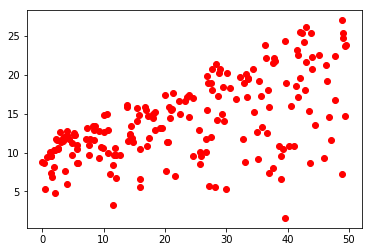

In [34]:
plt.scatter(df.radio,df.sales,color='red')

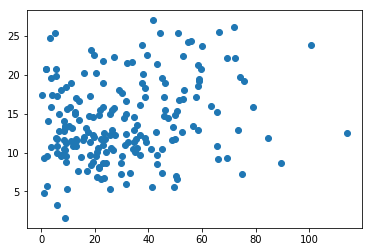

In [35]:
plt.scatter(df.newspaper,df.sales)

In [76]:
lm = smf.ols(formula = 'sales~TV',data=df).fit()

In [77]:
lm.params

Intercept    7.032594
TV           0.047537
dtype: float64

interpretasi:
- intercept (b0) : Y bernilai 7,032 ketika X bernilai 0
- TV (b1)        : untuk setiap kenaikan 1 unit TV, maka nilai Y meningkat sebesar 0,04
- persamaan : Y = 7,033 + 0,048X

In [78]:
lm.params
lm.predict()
lm.conf_int()
lm.pvalues
lm.rsquared
lm.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Mon, 28 May 2018   Prob (F-statistic):           1.47e-42
Time:                        13:14:03   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [75]:
lm.conf_int()

,0,1
Intercept,8.201588,10.421688
radio,0.162244,0.242747


- interval konfident tidak melewati 0, berarti variabel independet berpengaruh
- interval konfident tidak boleh melewati 0

In [53]:
lm.pvalues

Intercept    1.406300e-35
TV           1.467390e-42
dtype: float64

- diperoleh p-value variabel independen (TV) 1,46e-42 < 0,05 , berarti variabel TV berpengaruh terhadap variabel sales 

In [55]:
X_new = pd.DataFrame({'TV':[50]})
X_new.head()

,TV
0,50


In [56]:
lm.predict(X_new)

0    9.409426
dtype: float64

In [60]:
X_new = pd.DataFrame({'TV':[df.TV.min(),df.TV.max()]})
X_new

,TV
0,0.7
1,296.4


In [61]:
preds = lm.predict(X_new)
preds

0     7.065869
1    21.122454
dtype: float64

In [65]:
lm.rsquared

0.611875050850071

R-squared = 0,6119 atau 61,19%
- menjelaskan bahwa variabel independen (X) mampu menjelaskan variabel dependen (Y) sebesar 61,19% dan sisanya dijelaskan oleh variabel lain diluar model

### MULTIPLE REGRESSION

In [92]:
lm = smf.ols(formula = 'sales~TV+radio+newspaper',data=df).fit()

In [93]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Mon, 28 May 2018   Prob (F-statistic):           1.58e-96
Time:                        13:23:23   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
radio          0.1885      0.009     21.893      0.000       0.172       0.206
newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**UJI F SIMULTAN**
- Hipotesis:
   - H0 : tidak ada variabel x yang berpengaruh terhadap variabel Y
   - H1 : ada minimal 1 variabel x yang berpengaruh terhadap variabel Y
- Daerah Kritis : H0 ditolak jika p-value < 0,05
- Keputusan : H0 ditolak, karena p-value 1,58e-96 < 0,05
- Kesimpulan : ada minimal 1 variabel x yang berpengaruh terhadap variabel Y

- F dan P value dicek harus kurang dari <0,05 untuk menyatakan bahwa variabel berpengaruh
- Fvalue atau Prob(F-statstic) mengecek pengaruh antar variabel explanatory terhadap perubahan variabel dependen /respon
- Pvalue ngecek  pengaruh spesifik satu variabel explanatory terhadap perubahan di variabel respon/dependen
- Akaike Info Criteria (AIC) > semakin kecil maka model semakin bagus
- Bayesian Info Criteria (BIC) > semakin kecil semakin bagus modelnya
- AIC dan BIC digunakan untuk membandingkan antar model

**Asumsi Klasik Regresi Berganda**
- Durbin-watson = autokorelasi
  - angka mendekati nilai 2, data tersebut tidak ada autokorelasi
- Jarque-Bera = test normalitas
  - apakah model regresi yang kita punya sudah memiliki distribusi normal

### Menggunakan Fungsi lm.fit()

In [101]:
y = df.sales
feature_cols = ['TV','radio','newspaper']
x = df[feature_cols]

In [102]:
lm.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

- kekurangannya tidak ada fungsi lm.summary

**Intercept**

In [105]:
print(lm.intercept_)

2.9388893694594067


**Estimasi Koefisien**

In [106]:
print(lm.coef_)

[ 0.04576465  0.18853002 -0.00103749]


**R-Square**

In [107]:
lm.score(x,y)

0.8972106381789521